In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import votable
from astropy.table import Table
from astroquery.esa.xmm_newton import XMMNewton
from astropy.coordinates import SkyCoord
import astropy.units as u

ModuleNotFoundError: No module named 'pandas'

In [55]:
result = XMMNewton.query_xsa_tap("select top 10 * from xsa.v_epic_source_cat", output_format='csv', output_file='/Users/kciurleo/Documents/kciurleo/AGN/unorganized/test_results.csv')

print(result)

      bii        ccdm1 ccdm2 ccdpn ... tseries var_exp_id var_flag var_inst_id
---------------- ----- ----- ----- ... ------- ---------- -------- -----------
-52.142557318696     7     3     3 ...   false         --       --          --
-18.113900744149     6     7     4 ...   false         --       --          --
-59.907964825252     3     4    10 ...   false         --       --          --
-59.754597327708     3     5     8 ...    true         --       --          --
 5.5816273421188     6     7     4 ...   false         --       --          --
-38.124328197669     5    --    -- ...   false         --       --          --
-55.449909227666    --     2     2 ...   false         --       --          --
-60.771415214831    --     4    11 ...   false         --       --          --
-59.866008014595     3     4    -- ...   false         --       --          --
-17.536153023868     6     7    -- ...    true       S003    false          M2


In [5]:
seyferts = votable.parse_single_table('/Users/kciurleo/Documents/kciurleo/AGN/csvs/seyferts.vot').to_table().to_pandas()

In [6]:
XMM_result = votable.parse_single_table('/Users/kciurleo/Documents/kciurleo/AGN/csvs/XMM_query_result.vot').to_table().to_pandas()

In [43]:
#Get angular separation in arcsec
for id, row in XMM_result.iterrows():
    base_coords = SkyCoord(ra=row['ra']*u.deg, dec=row['dec']*u.deg, frame='icrs')
    separation = base_coords.separation(SkyCoord(row['ra_2']*u.deg, row['dec_2']*u.deg, frame='icrs')).to(u.arcsec).value
    XMM_result.at[id, 'Separation'] = separation

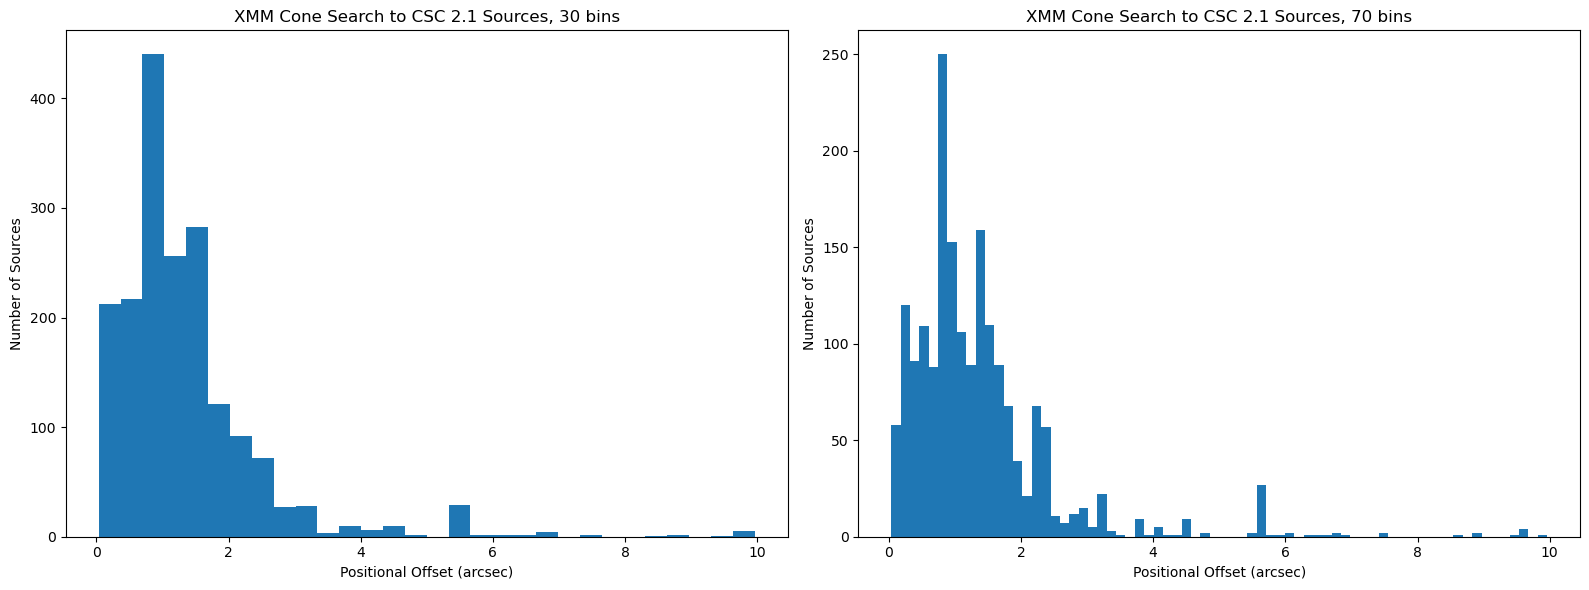

In [67]:
#Histogram
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(XMM_result['Separation'], bins=30)
axs[0].set_xlabel("Positional Offset (arcsec)")
axs[0].set_ylabel("Number of Sources")
axs[0].set_title("XMM Cone Search to CSC 2.1 Sources, 30 bins")


axs[1].hist(XMM_result['Separation'], bins=70)
axs[1].set_xlabel("Positional Offset (arcsec)")
axs[1].set_ylabel("Number of Sources")
axs[1].set_title("XMM Cone Search to CSC 2.1 Sources, 70 bins")
plt.tight_layout()
plt.show()

In [ ]:
#Single histogram for thesis
#Histogram
plt.figure(figsize=(8, 6))

plt.hist(XMM_result['Separation'], bins=70)
plt.xlabel("Positional Offset (arcsec)")
plt.ylabel("Number of Sources")
plt.title("XMM Cone Search of CSC 2.1 Sources, 70 bins")
plt.savefig("/Users/kciurleo/Documents/kciurleo/AGN/plots/xmmhist.pdf")
plt.show()

In [72]:
#Quick Koulouridis sanity check
csc_obsids = pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/obsids_seyferts.csv')['CHANDRA_OBSID']
koulouridis_obsids = [2135,9270,11688,11689,12106,12119,12735,18121,19496,20888,20889,20890,20891,28658]

In [77]:
#Identified by Koulouridis but not by me:
print(set(koulouridis_obsids)- set(csc_obsids))
print('from PKS 0836+299, 4c+29.30, and MRK34')

#Identified by both of us:
print(set(koulouridis_obsids)-(set(koulouridis_obsids)- set(csc_obsids)))
print('all from 3C 192')

#Want to check to see what targets the guys I don't have are related to somehow

{11688, 11689, 12106, 18121, 28658, 2135, 12119, 12735}
from PKS 0836+299, 4c+29.30, and MRK34
{19496, 9270, 20888, 20889, 20890, 20891}
all from 3C 192
